# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Data Ingestion

In [2]:
data=pd.read_csv(r'..\artifacts\UCI_Credit_Card.csv')
df=data.copy()
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


About Dataset
============

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Content
--------

There are 25 variables:

- **ID**: ID of each client
- **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- **SEX**: Gender (1=male, 2=female)
- **EDUCATION**: Marital status (1=married, 2=single, 3=others)
- **AGE**: Age in years
- **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- **PAY_2**: Repayment status in August, 2005 (scale same as above)
- **PAY_3**: Repayment status in July, 2005 (scale same as above)
- **PAY_4**: Repayment status in June, 2005 (scale same as above)
- **PAY_5**: Repayment status in May, 2005 (scale same as above)
- **PAY_6**: Repayment status in April, 2005 (scale same as above)
- **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
- **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
- **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
- **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
- **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
- **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
- **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
- **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
- **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
- **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
- **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
- **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
- **default.payment.next.month**: Default payment (1=yes, 0=no)

# 3. Data Cleaning and Transformation with EDA

## 3.1 Handling Duplicates

In [3]:
#checking duplicates
df.duplicated().sum()

0

#### Observation
- No duplicates found

## 3.2 Handling Missing Values

In [4]:
#checking null values
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

#### Observation
- No null values found

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

## 3.3 Handling Limit_Bal Column

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Count'>

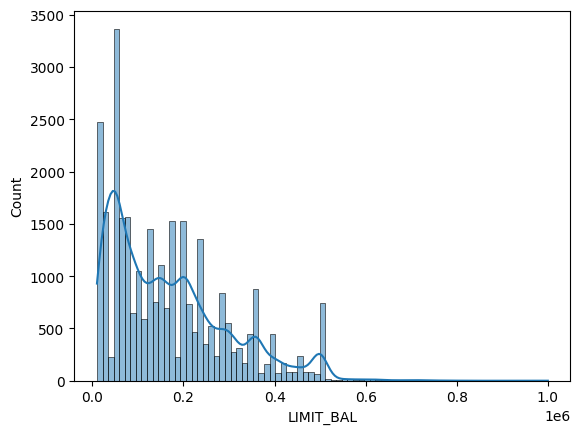

In [6]:
sns.histplot(data=df,x='LIMIT_BAL',kde=True)

In [7]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [8]:
np.quantile(df['LIMIT_BAL'],0.99)

500000.0

<AxesSubplot:xlabel='LIMIT_BAL'>

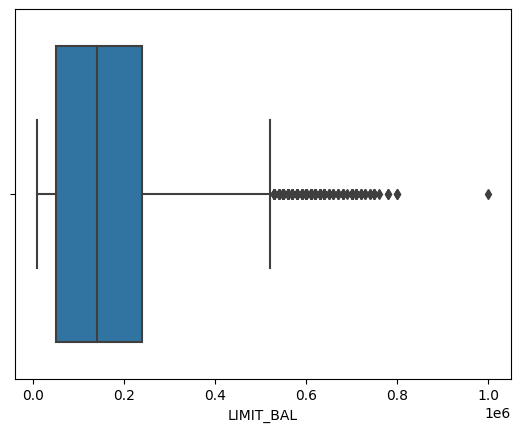

In [9]:
# checking outliers
sns.boxplot(data=df,x='LIMIT_BAL')

In [10]:
# Capping at 95%
df.loc[df['LIMIT_BAL']>=df['LIMIT_BAL'].quantile(0.95),'LIMIT_BAL']=df['LIMIT_BAL'].quantile(0.95)

<AxesSubplot:xlabel='LIMIT_BAL'>

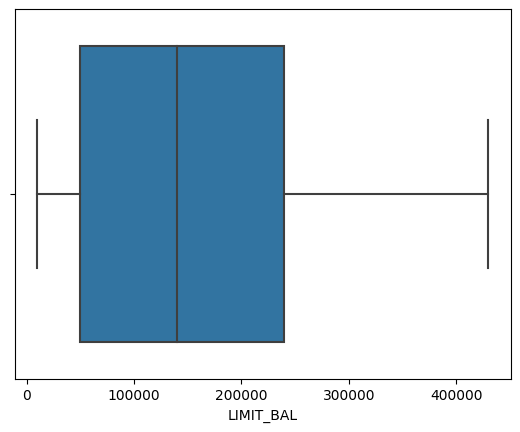

In [11]:
sns.boxplot(data=df,x='LIMIT_BAL')

#### Observations
- The distribution of LIMIT_BAL column is a right skewed normal distribution.
- It is also observed that even though maximum credit limit is 1 million, More than 75 % of the customers have a credit limit less than 240,000 Dollars. 
- 99% of customers have credit limit less than 500K dollars

## 3. 4 Handling Sex Column

<AxesSubplot:xlabel='SEX', ylabel='count'>

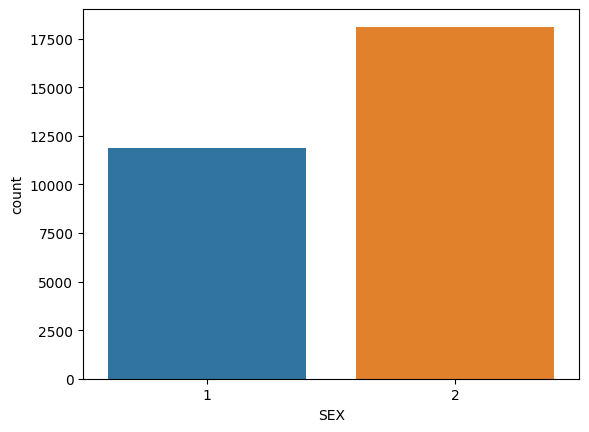

In [12]:
sns.countplot(x='SEX',data=df)

In [13]:
df['SEX'].value_counts( normalize=True )

2    0.603733
1    0.396267
Name: SEX, dtype: float64

#### Observations
- 60 % are Females and 40 % are males among Customers

## 3.5 Handling Education Column

In [14]:
df['EDUCATION'].value_counts(normalize=True)
# 1 is graduate school
# 2 is high school
# 3 is university
# others are unknown

2    0.467667
1    0.352833
3    0.163900
5    0.009333
4    0.004100
6    0.001700
0    0.000467
Name: EDUCATION, dtype: float64

In [15]:
# According to the dataset description, only 1,2,3 are associated with known educational institutions
# Let's replace (4,5,6,0) with 4 representing unknown educational qualification.
df['EDUCATION']=df['EDUCATION'].apply(lambda x:str(x)).str.replace(r'[0456]',r'4')
df['EDUCATION'].value_counts(normalize=True)
# 1 is graduate school
# 2 is high school
# 3 is university
# 4 is unknown

2    0.467667
1    0.352833
3    0.163900
4    0.015600
Name: EDUCATION, dtype: float64

#### Observation 
- Only 1.5 % of customers have unknown education qualifications
- More than 70 % of customers have completed high school and pursued higher education

## 3.6 Handling Marriage Column

In [16]:
df['MARRIAGE'].value_counts(normalize=True)

# 1 is married
# 2 is single
# 3,0 refer to others

# Let's merge them

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64

In [17]:
df['MARRIAGE']=df['MARRIAGE'].apply(lambda x:str(x)).str.replace(r'[30]',r'3')
df['MARRIAGE'].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

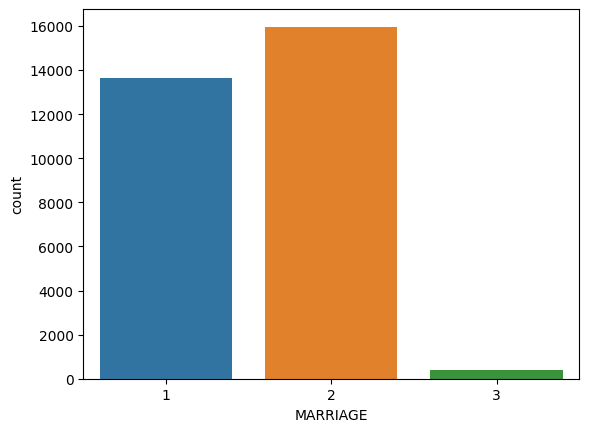

In [18]:
sns.countplot(data=df,x='MARRIAGE')

#### Observation
- 53% of customers are married
- 45 % of customers are single and others have unknown marriage status

## 3.7 Handling Age

<AxesSubplot:xlabel='AGE', ylabel='Count'>

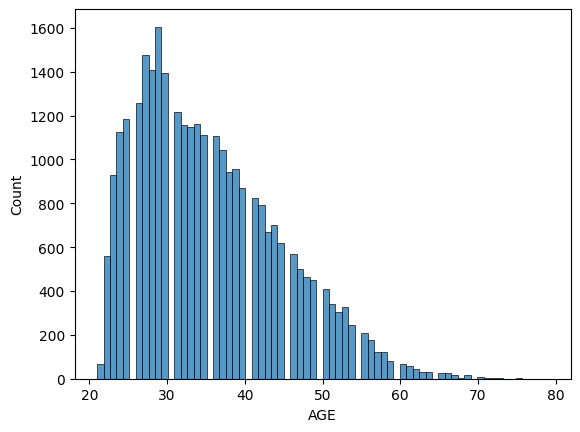

In [19]:
sns.histplot(data=df,x='AGE')

In [20]:
df['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

#### Observation
- Median age of customers is 34 and 21 is minimum age among registered customers

## 3.8 Handling default payment next month

In [21]:
df['default.payment.next.month'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default.payment.next.month, dtype: float64

#### Observation
- The given dataset is imbalanced. So the use of accuracy as a metric is futile. 
- Hence metric like AUC , F1 score should be used for model evaluation
- Here the bank doesn't want any customers who defaults so we need to focus on decreasing False Negatives so Recall can also be used in this case

- 77 % of customers have not defaulted on their payments
- 22 % of customers have defaulted on their payments

## 3.9 Renaming ALL other columns to comprehensible names

In [22]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [23]:
df.rename(columns={'PAY_0':'Sept_RP_Status','PAY_2':'August_RP_Status','PAY_3':'July_RP_Status','PAY_4':'June_RP_Status','PAY_5':'May_RP_Status','PAY_6':'April_RP_Status'},inplace=True)

In [24]:
df.rename(columns={'BILL_AMT1':'Sept_BillAmt', 'BILL_AMT2':'August_BillAmt','BILL_AMT3':'July_BillAmt','BILL_AMT4':'June_BillAmt','BILL_AMT5':'May_BillAmt','BILL_AMT6':'April_BillAmt'},inplace=True)

In [25]:
df.rename(columns={'PAY_AMT1':'August_AmtPaid', 'PAY_AMT2':'July_AmtPaid', 'PAY_AMT3':'June_AmtPaid', 'PAY_AMT4':'May_AmtPaid',
       'PAY_AMT5':'April_AmtPaid', 'PAY_AMT6':'March_AmtPaid'},inplace=True)

In [26]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'Sept_RP_Status', 'August_RP_Status', 'July_RP_Status',
       'June_RP_Status', 'May_RP_Status', 'April_RP_Status', 'Sept_BillAmt',
       'August_BillAmt', 'July_BillAmt', 'June_BillAmt', 'May_BillAmt',
       'April_BillAmt', 'August_AmtPaid', 'July_AmtPaid', 'June_AmtPaid',
       'May_AmtPaid', 'April_AmtPaid', 'March_AmtPaid',
       'default.payment.next.month'],
      dtype='object')

## 3.10 Handling Repayment Status Columns

In [27]:
df['Sept_RP_Status'].value_counts(normalize=True)
# 0,-1, is paid on time
# -2 is paid in advance
# -1 is still not paid
# -2 is also still not paid
# x>0 is number of months they took they pay

 0    0.491233
-1    0.189533
 1    0.122933
-2    0.091967
 2    0.088900
 3    0.010733
 4    0.002533
 5    0.000867
 8    0.000633
 6    0.000367
 7    0.000300
Name: Sept_RP_Status, dtype: float64

In [28]:
# if customer paid on time or advance, then let it be at 0 else any number

def transform_RP_status(x):
    if x<=0: return 0 # paid on time or advance
    else: return x # x months of payment delay

for col in ['Sept_RP_Status', 'August_RP_Status', 'July_RP_Status','June_RP_Status', 'May_RP_Status', 'April_RP_Status']:
    df[col]=df[col].apply(transform_RP_status)



In [29]:
df['Sept_RP_Status'].value_counts(normalize=True)

0    0.772733
1    0.122933
2    0.088900
3    0.010733
4    0.002533
5    0.000867
8    0.000633
6    0.000367
7    0.000300
Name: Sept_RP_Status, dtype: float64

## 3.11 Handling Bill Amount Columns

In [30]:
df['Sept_BillAmt'].describe()

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: Sept_BillAmt, dtype: float64

In [39]:
# Generally, we receive a negative credit card bill when the bank owes money to us. It simply means that we are paying more than we owe.
# So Let's make it zero.
def transform_BillAmt(x):
    if x<0: return 0
    else: return x



In [43]:
for col in ['Sept_BillAmt', 'August_BillAmt', 'July_BillAmt','June_BillAmt', 'May_BillAmt', 'April_BillAmt']:
    df[col]=df[col].apply(lambda x:transform_BillAmt(x))
    

In [44]:
df[['Sept_BillAmt', 'August_BillAmt', 'July_BillAmt','June_BillAmt', 'May_BillAmt', 'April_BillAmt']].describe()

,Sept_BillAmt,August_BillAmt,July_BillAmt,June_BillAmt,May_BillAmt,April_BillAmt
count,30000.00000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51246.04190,49206.518033,4.704517e+04,43299.651933,40347.092100,38942.268767
std,73608.02908,71150.744613,6.931878e+04,64294.968472,60766.619726,59445.970807
min,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,3558.75000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.50000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.00000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.00000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


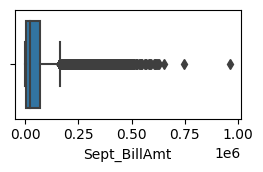

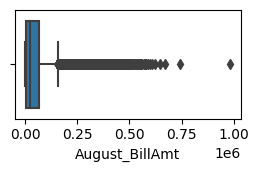

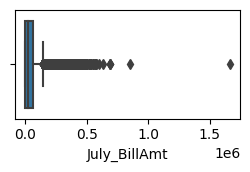

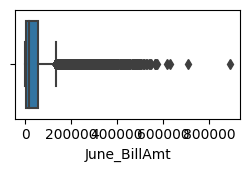

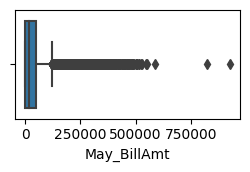

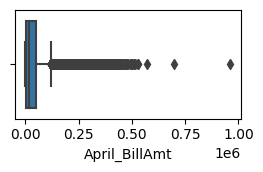

In [53]:
# checking for outliers
i=0
for col in ['Sept_BillAmt', 'August_BillAmt', 'July_BillAmt','June_BillAmt', 'May_BillAmt', 'April_BillAmt']:
    i+=1
    plt.subplot(3,2,i)
    sns.boxplot(data=df,x=col)
    plt.show()


In [54]:
# let's remove outliers
def cap_upper(df,feature,limit):
    
    percentile_limit=df[feature].quantile(limit)
    df.loc[df[feature]>=percentile_limit,feature]=percentile_limit
    return df[feature]



In [57]:
for col in ['Sept_BillAmt','August_BillAmt', 'July_BillAmt', 'June_BillAmt', 'May_BillAmt','April_BillAmt']:
    df[col]=cap_upper(df,col,limit=0.90)

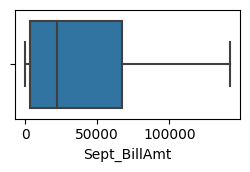

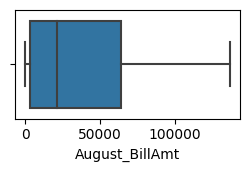

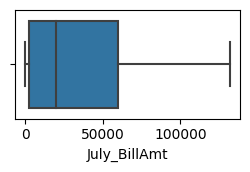

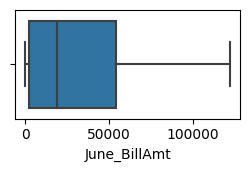

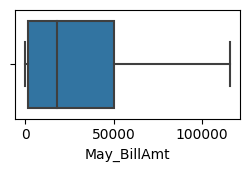

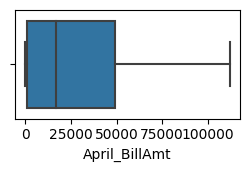

In [58]:
# checking for outliers
i=0
for col in ['Sept_BillAmt', 'August_BillAmt', 'July_BillAmt','June_BillAmt', 'May_BillAmt', 'April_BillAmt']:
    i+=1
    plt.subplot(3,2,i)
    sns.boxplot(data=df,x=col)
    plt.show()


#### Observation
- 90% of bill amounts are less than 125k

## 3.12 Handling Paid Amount Columns

In [62]:
df[['August_AmtPaid', 'July_AmtPaid', 'June_AmtPaid','May_AmtPaid', 'April_AmtPaid', 'March_AmtPaid']].describe()

,August_AmtPaid,July_AmtPaid,June_AmtPaid,May_AmtPaid,April_AmtPaid,March_AmtPaid
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


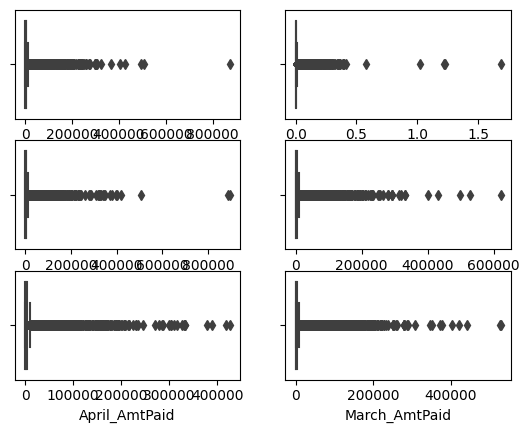

In [70]:
i=1
for col in ['August_AmtPaid', 'July_AmtPaid', 'June_AmtPaid','May_AmtPaid', 'April_AmtPaid', 'March_AmtPaid']:
    plt.subplot(3,2,i)    
    sns.boxplot(data=df,x=col)
    i+=1

In [71]:
# removing outliers
for col in ['August_AmtPaid', 'July_AmtPaid', 'June_AmtPaid','May_AmtPaid', 'April_AmtPaid', 'March_AmtPaid']:
    df[col]=cap_upper(df,col,limit=0.90)

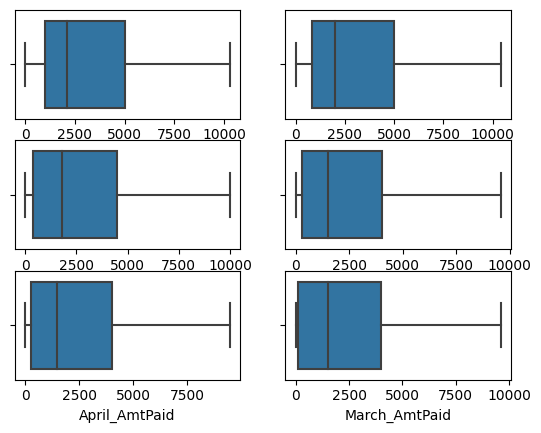

In [72]:
i=1
for col in ['August_AmtPaid', 'July_AmtPaid', 'June_AmtPaid','May_AmtPaid', 'April_AmtPaid', 'March_AmtPaid']:
    plt.subplot(3,2,i)    
    sns.boxplot(data=df,x=col)
    i+=1

# 4. EDA

### Q Identify the range of credit limit for which associated customers are defaulting

In [31]:
df[['LIMIT_BAL','default.payment.next.month']]

,LIMIT_BAL,default.payment.next.month
0,20000.0,1
1,120000.0,1
2,90000.0,0
3,50000.0,0
4,50000.0,0
...,...,...
29995,220000.0,0
29996,150000.0,0
29997,30000.0,1
29998,80000.0,1


<AxesSubplot:xlabel='default.payment.next.month', ylabel='LIMIT_BAL'>

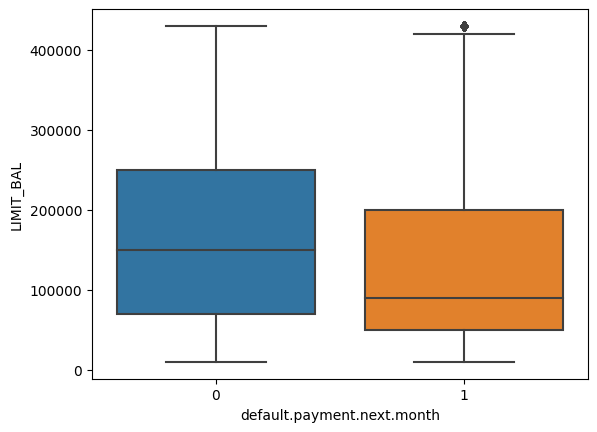

In [32]:
sns.boxplot(data=df,x='default.payment.next.month',y='LIMIT_BAL')
# 0 is not default
# 1 is default

Customers who's credit limit is below 50K are more prone to default.

### Q Any relationship between Sex and Default?


<AxesSubplot:ylabel='default.payment.next.month'>

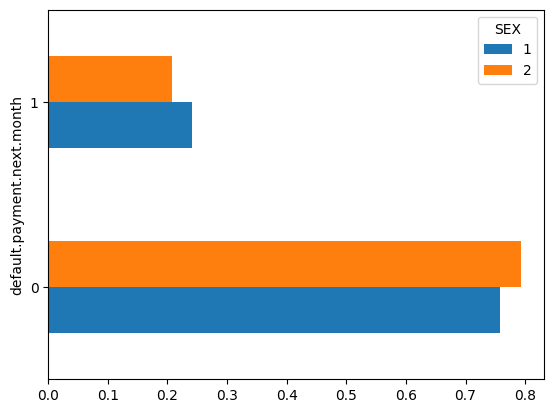

In [33]:
pd.crosstab(df['default.payment.next.month'], df['SEX'],normalize='columns').plot(kind='barh')
# normalized columns, since we have more number of females than male customers.

Males are prone to default than females. 

### Q Find any relationship between education qualification of the customer and the default

<AxesSubplot:ylabel='default.payment.next.month'>

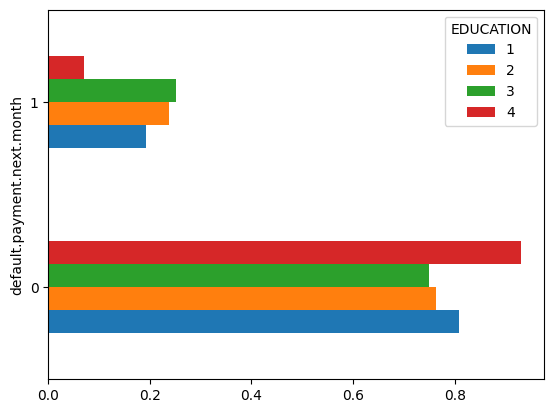

In [34]:
pd.crosstab(df['default.payment.next.month'], df['EDUCATION'],normalize='columns').plot(kind='barh')
# 1 is graduate school
# 2 is high school
# 3 is university
# 4 is unknown

- Customers with unknown education qualification are less prone to default
- Customers who completed university and those who completed high school are more prone to default.

### Q Married Status and Default

<AxesSubplot:ylabel='default.payment.next.month'>

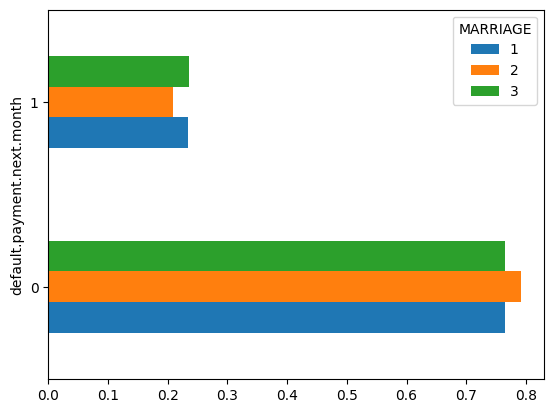

In [35]:
pd.crosstab(df['default.payment.next.month'], df['MARRIAGE'],normalize='columns').plot(kind='barh')

- Customers who are married and those with unknown status are more prone to default

### Q Age and Default

<AxesSubplot:xlabel='default.payment.next.month', ylabel='AGE'>

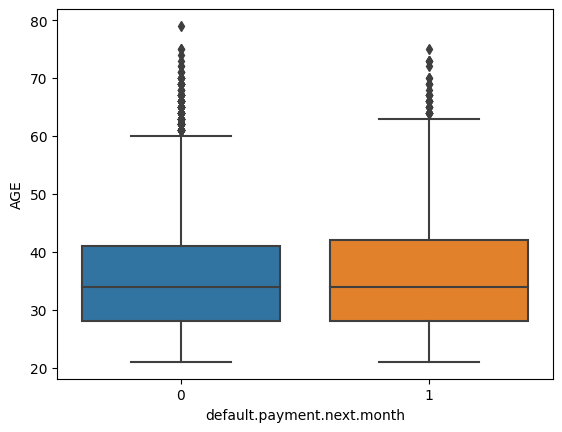

In [36]:
sns.boxplot(data=df,x='default.payment.next.month',y='AGE')

- Fairly same

### Q Relation between Default and Repayment Status

In [37]:
df[df['default.payment.next.month']==1][['Sept_RP_Status', 'August_RP_Status', 'July_RP_Status',
       'June_RP_Status', 'May_RP_Status', 'April_RP_Status']]

,Sept_RP_Status,August_RP_Status,July_RP_Status,June_RP_Status,May_RP_Status,April_RP_Status
0,2,2,0,0,0,0
1,0,2,0,0,0,2
13,1,2,2,0,0,2
16,0,0,2,2,2,2
21,0,0,0,0,0,0
...,...,...,...,...,...,...
29991,3,2,2,2,2,2
29994,2,2,2,2,2,2
29997,4,3,2,0,0,0
29998,1,0,0,0,0,0


In [38]:
df['Sept_RP_Status'].value_counts()

0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: Sept_RP_Status, dtype: int64

### Q Relationship between Bill amount and non-default, default customers

In [59]:
df[['Sept_BillAmt','August_BillAmt', 'July_BillAmt', 'June_BillAmt', 'May_BillAmt','April_BillAmt','default.payment.next.month']].groupby(by='default.payment.next.month').median()

,Sept_BillAmt,August_BillAmt,July_BillAmt,June_BillAmt,May_BillAmt,April_BillAmt
default.payment.next.month,,,,,,
0,23119.5,21660.5,20202.5,19000.0,17998.0,16679.0
1,20185.0,20300.5,19834.5,19119.5,18478.5,18028.5


<AxesSubplot:ylabel='default.payment.next.month'>

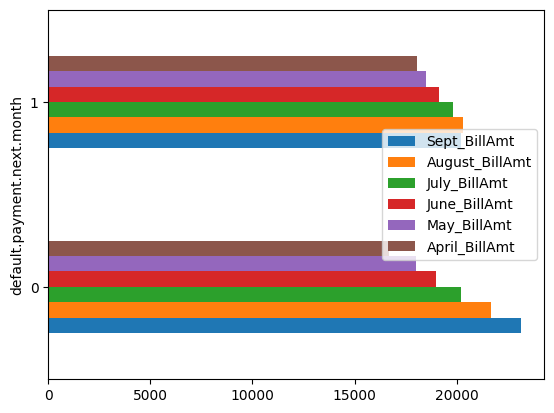

In [60]:
df[['Sept_BillAmt','August_BillAmt', 'July_BillAmt', 'June_BillAmt', 'May_BillAmt','April_BillAmt','default.payment.next.month']].groupby(by='default.payment.next.month').median().plot(kind='barh')

- Customers who have defaulted have last three months(July,August,September) bill around 20K

### Q Relation between Last month Paid amount and the default status

In [73]:
df[['August_AmtPaid', 'July_AmtPaid', 'June_AmtPaid','May_AmtPaid', 'April_AmtPaid', 'March_AmtPaid','default.payment.next.month']].groupby(by='default.payment.next.month').median()

,August_AmtPaid,July_AmtPaid,June_AmtPaid,May_AmtPaid,April_AmtPaid,March_AmtPaid
default.payment.next.month,,,,,,
0,2459.5,2247.5,2000.0,1734.0,1765.0,1706.0
1,1636.0,1533.5,1222.0,1000.0,1000.0,1000.0


<AxesSubplot:ylabel='default.payment.next.month'>

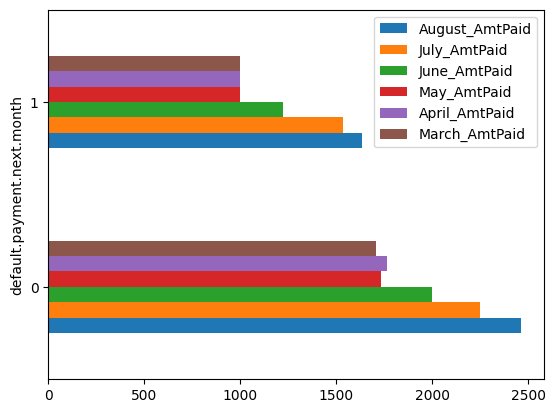

In [74]:
df[['August_AmtPaid', 'July_AmtPaid', 'June_AmtPaid','May_AmtPaid', 'April_AmtPaid', 'March_AmtPaid','default.payment.next.month']].groupby(by='default.payment.next.month').median().plot(kind='barh')

- Payment patterns of default and non default customers is kinda same.
- It is evident that customers who defaulted paid the most on August. So they tried but were unable to repay it